In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [50]:
df=pd.read_csv("students.csv")
df

,Study_Hours,Attendance,Assignments_Completed,Department,Gender,Final_Score
0,4.37,84.91,12,Arts,Male,66.44
1,9.56,76.80,7,Commerce,Male,85.36
2,7.59,65.48,12,Science,Female,96.36
3,6.39,90.69,9,Science,Male,86.04
4,2.40,84.24,5,Arts,Female,46.09
...,...,...,...,...,...,...
495,4.18,54.58,9,Commerce,Female,68.00
496,6.25,95.87,8,Arts,Female,77.89
497,1.70,56.84,14,Science,Male,67.33
498,9.77,97.51,5,Commerce,Female,95.77


In [51]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,Study_Hours,Attendance,Assignments_Completed,Department,Gender,Final_Score
0,4.37,84.91,12,0,1,66.44
1,9.56,76.80,7,1,1,85.36
2,7.59,65.48,12,2,0,96.36
3,6.39,90.69,9,2,1,86.04
4,2.40,84.24,5,0,0,46.09
...,...,...,...,...,...,...
495,4.18,54.58,9,1,0,68.00
496,6.25,95.87,8,0,0,77.89
497,1.70,56.84,14,2,1,67.33
498,9.77,97.51,5,1,0,95.77


In [52]:
x=df.drop("Final_Score",axis=1)
y=df["Final_Score"]


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [54]:
model=LinearRegression()
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [55]:
y_pre=model.predict(x_test)
y_pre

array([ 89.88799279,  99.312982  ,  42.67333966,  55.24218931,
        82.23470525,  79.04812551,  55.30649154,  65.64969451,
        60.0577472 ,  91.22817566,  91.93450833,  63.97355397,
        87.29797982,  68.89527051,  46.01343578,  72.24043603,
        62.92950848,  82.07453899,  86.63421559,  91.59714037,
        80.91036748,  88.35709879,  86.215366  ,  59.85757931,
        83.17883324,  79.64292582,  62.18506525,  79.28525847,
        74.9838181 ,  43.34219161,  90.47591017,  97.02164208,
        53.45403955,  65.16807771,  95.4406584 ,  36.24673844,
        54.82427827,  93.59215224,  57.29091152,  56.87481325,
        96.08144609,  74.76299336,  95.1201445 ,  83.68201124,
        91.04776962,  68.29787423,  70.49497259,  96.53051542,
        77.13028397,  66.97730149,  55.6196441 ,  97.00013058,
        84.62006773,  58.28398247,  81.08990968,  88.74524466,
        52.14587481,  69.28755922,  63.20252978,  66.94140236,
        76.62142887,  57.02383723,  72.20974013,  70.29

In [56]:
mse=mean_squared_error(y_pre,y_test)
rmse=np.sqrt(mse)
print(mse)
print(rmse)
score=r2_score(y_pre,y_test)
print(f"accuracy score :{score*100:.2f}%")


24.704322911862945
4.970344345401327
accuracy score :90.05%


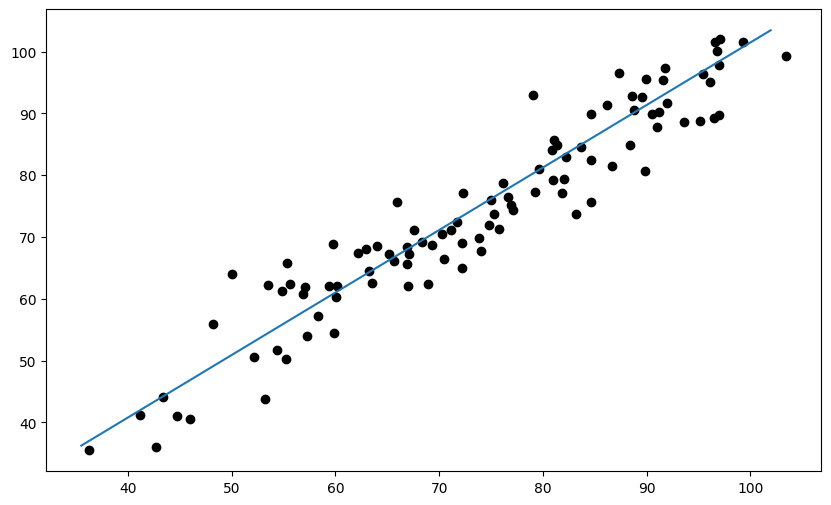

In [57]:
plt.figure(figsize=[10,6])
plt.scatter(y_pre,y_test,c="k")
plt.plot([y_test.min(),y_test.max()],[y_pre.min(),y_pre.max()])
plt.show()

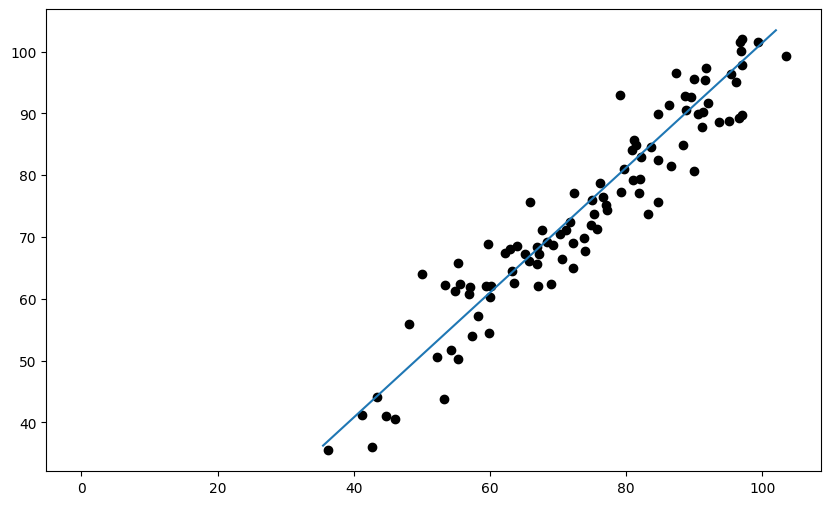

In [60]:
new=pd.DataFrame({
    "Study_Hours":4.37,
    "Attendance":84.91,
    "Assignments_Completed":12,
    "Department":label.fit_transform(["Arts"]),
    "Gender":label.fit_transform(["Male"])
})
predict=model.predict(new)
predict
plt.figure(figsize=[10,6])
plt.scatter(y_pre,y_test,c="k")
plt.plot([y_test.min(),y_test.max()],[y_pre.min(),y_pre.max()])
plt.plot(new,predict)
plt.show()
